In [1]:
import tensorflow as tf
from zipfile import ZipFile
import os,glob
import cv2
from tqdm.notebook import tqdm_notebook as tqdm
import numpy as np
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dropout, Dense
from keras.layers import BatchNormalization
from keras.layers import Flatten, MaxPooling2D, GlobalAveragePooling2D


In [2]:
file_name = "Healthcare-images-classification-20221006T055456Z-001.zip"
with ZipFile(file_name,'r') as zip:
  zip.extractall()
  print('Done')

Done


In [10]:
os.getcwd()

'C:\\Users\\owner\\OneDrive\\Desktop\\Internship\\Healthcare-images-classification\\ECG'

In [13]:
os.chdir(r"C:\Users\owner\OneDrive\Desktop\Internship")

In [15]:
os.chdir(r'C:\Users\owner\OneDrive\Desktop\Internship\Healthcare-images-classification/ECG')
X = []
y = []
for i in tqdm(os.listdir()):
      img = cv2.imread(i)   
      img = cv2.resize(img,(224,224))
      X.append(img)
for i in range(1,3):
      y.append('E')
      #y.append((i[0:1]))
      #print(i[0:1])

os.chdir(r'C:\Users\owner\OneDrive\Desktop\Internship\Healthcare-images-classification/Presciption')
for i in tqdm(os.listdir()):
      img = cv2.imread(i)   
      img = cv2.resize(img,(224,224))
      X.append(img)
for i in range(1,12):
    y.append('P')

os.chdir(r'C:\Users\owner\OneDrive\Desktop\Internship\Healthcare-images-classification/Report')
for i in tqdm(os.listdir()):
      img = cv2.imread(i)   
      img = cv2.resize(img,(224,224))
      X.append(img)
for i in range(1,79):
    y.append('R')

os.chdir(r'C:\Users\owner\OneDrive\Desktop\Internship\Healthcare-images-classification/X-Ray')
for i in tqdm(os.listdir()):
      img = cv2.imread(i)   
      img = cv2.resize(img,(224,224))
      X.append(img)
for i in range(1,11):
    y.append('X')
print(y)

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/11 [00:00<?, ?it/s]

  0%|          | 0/78 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

['E', 'E', 'P', 'P', 'P', 'P', 'P', 'P', 'P', 'P', 'P', 'P', 'P', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'X', 'X', 'X', 'X', 'X', 'X', 'X', 'X', 'X', 'X']


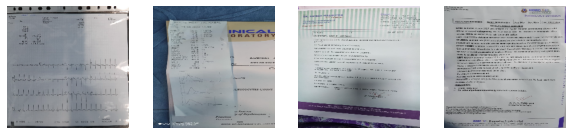

In [16]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 10))
for i in range(4):
    plt.subplot(1, 4, i+1)
    plt.imshow(X[i], cmap="gray")
    plt.axis('off')
plt.show()

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
print ("Shape of an image in X_train: ", X_train[0].shape)
print ("Shape of an image in X_test: ", X_test[0].shape)

Shape of an image in X_train:  (224, 224, 3)
Shape of an image in X_test:  (224, 224, 3)


In [18]:
le = preprocessing.LabelEncoder()
y_train = le.fit_transform(y_train)
y_test = le.fit_transform(y_test)
y_train = tf.keras.utils.to_categorical(y_train, num_classes=4)
y_test = tf.keras.utils.to_categorical(y_test, num_classes=4)
y_train = np.array(y_train)
X_train = np.array(X_train)
y_test = np.array(y_test)
X_test = np.array(X_test) 

In [19]:
print("X_train Shape: ", X_train.shape) 
print("X_test Shape: ", X_test.shape)
print("y_train Shape: ", y_train.shape) 
print("y_test Shape: ", y_test.shape)

X_train Shape:  (67, 224, 224, 3)
X_test Shape:  (34, 224, 224, 3)
y_train Shape:  (67, 4)
y_test Shape:  (34, 4)


In [20]:
from keras.applications.vgg19 import VGG19

In [21]:
vgg19 = VGG19(include_top=False,
              weights='imagenet',
              input_shape=(224,224,3),
              pooling=None)

In [22]:
vgg19.layers

In [23]:
vgg19.summary()

Model: "vgg19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [24]:
for layer in vgg19.layers:
    layer.trainable = False

In [25]:
model = Sequential()
model.add(vgg19)
model.add(MaxPooling2D())
model.add(Dropout(0.25))
model.add(Flatten())

#model.add(Dense(128, activation='relu'))
#model.add(BatchNormalization())
#model.add(Dropout(0.2))

model.add(Dense(4, activation='softmax', name='predictions'))

In [26]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg19 (Functional)          (None, 7, 7, 512)         20024384  
                                                                 
 max_pooling2d (MaxPooling2D  (None, 3, 3, 512)        0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 3, 3, 512)         0         
                                                                 
 flatten (Flatten)           (None, 4608)              0         
                                                                 
 predictions (Dense)         (None, 4)                 18436     
                                                                 
Total params: 20,042,820
Trainable params: 18,436
Non-trainable params: 20,024,384
_______________________________________

In [27]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [28]:

output_dir = 'model_output/transfer_VGG'

In [29]:
from keras.callbacks import ModelCheckpoint 
modelcheckpoint = ModelCheckpoint(filepath=output_dir+
                                 "/weights.{epoch:02d}.hdf5")

In [30]:
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

In [31]:
history=model.fit(X_train,y_train, batch_size=2,
                    epochs=15, 
                    validation_data=(X_test,y_test),
                    verbose = 1,  callbacks=[modelcheckpoint])

Epoch 1/15
15/34 [============>.................] - ETA: 37s - loss: 14.3043 - accuracy: 0.6667

KeyboardInterrupt: 

In [50]:
model.load_weights(output_dir + '/weights.03.hdf5')

In [ ]:
#import shutil
#shutil.rmtree('/content/Healthcare-images-classification', ignore_errors=True)


In [ ]:
%matplotlib inline
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()

plt.show()

In [51]:
test_0=X_test[0].reshape(1,224,224,3)

In [52]:
model.predict(test_0)

array([[2.161316e-08, 6.852740e-03, 9.931456e-01, 1.661354e-06]],
      dtype=float32)

In [54]:
np.argmax(model.predict(test_0))

2

In [55]:
np.argmax(y_test[0])

2

In [104]:
# response= np.arange(68).reshape(34,2)
# print(response[0].append(1));
response=[]
for i in range(34):
   test=X_test[i].reshape(1,224,224,3)
   response.append(np.argmax(model.predict(test)))

print(response)

[2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 2, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 2, 3, 2, 2]


In [103]:
res1=[]
for i in range(34):
  res1.append(np.argmax(y_test[i]))
print(res1)

[2, 2, 2, 2, 2, 2, 2, 2, 1, 0, 2, 2, 3, 2, 2, 1, 3, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 3, 1, 3, 2, 2]


In [ ]:
arr=[][]